# Pandas 学习笔记

* 版本号： 0.3
* 创建时间： 2015年02月07日 星期六 10:26:33 CST
* 修改时间： 2020年08月24日
* 数据来源：
 * movies.csv http://boxofficemojo.com/daily/
 * iris.csv https://github.com/dsaber/py-viz-blog
 * titanic.csv https://github.com/dsaber/py-viz-blog
 * ts.csv https://github.com/dsaber/py-viz-blog

## 安装使用
2020年1月更新:

* jupyter 已经进化出 `jupyter-lab` 了。

2018年更新:

ipython notebook 已更名为 jupyter notebook 。安装使用方法如下：
* 安装 anaconda ，anaconda 是一个 Python 发行版。装好后就已经包含 `pandas` 和 `jupyter notebook` 。
* 运行 `jupyter notebook` 命令就可以使用 jupyter notebook 。
* 要在 notebook 即时显示图表，可以使用在 notebook 中使用 `%matplotlib inline` 命令。

下面是以前的安装使用方法：

* 安装 pandas
```shell
sudo apt-get install build-essential python-dev
sudo apt-get install python-pandas python-tk
sudo apt-get install python-scipy python-matplotlib python-tables
sudo apt-get install python-numexpr python-xlrd python-statsmodels
sudo apt-get install python-openpyxl python-xlwt python-bs4
```    
if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

* 安装 ipython-notebook
```shell
sudo pip install "ipython[notebook]"
sudo pip install pygments
```
* 使用``ipython notebook``运行 ipython-notebook 。如果使用matplotlib内嵌进网页中,那么需要运行:`ipython notebook --matplotlib inline` ；或者在已经打开的 notebook 中运行 `%matplotlib inline` 命令。

## 预备工作

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
# 辅助函数
def get_movie_df():
    """
    获得 movie dataframe
    """
    return pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')

def get_titanic_df():
    return pd.read_csv('datas/titanic.csv')

def get_iris_df():
    return pd.read_csv('datas/iris.csv')

def get_random_df():
    return pd.DataFrame(
        np.random.randn(6, 4),
        index=pd.date_range('20200101', periods=6),
        columns=list('ABCD'))

In [3]:
# 查看 pandas 的版本
pd.__version__

'1.0.1'

In [4]:
# 查看当前环境涉及软件的版本
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.0-42-generic
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : zh_CN.UTF-8
LOCALE           : zh_CN.UTF-8

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : 0.29.22
pytest           : 5.4.3
hypothesis       : 6.4.3
sphinx           : 3.5.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.2
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.21.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck       : 1.3.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.6.2
matplotlib       : 

## DataFrame

### 全局用法

In [76]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,0.722665,-0.760886,0.237480,-1.079067
2020-01-02,1.059809,-0.262708,0.963539,1.373857
2020-01-03,0.297924,0.505685,2.913570,0.419933
2020-01-04,-0.908743,1.653012,0.535265,-0.573266
2020-01-05,-1.673204,-1.161477,0.423735,2.101126
2020-01-06,-0.470087,-0.178049,-1.072577,-2.520762


In [71]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [72]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [73]:
df.values

array([[ 0.66595115, -0.71052047, -1.32995994,  1.89493911],
       [-1.17858788,  2.50071234,  0.64081373, -0.79849366],
       [ 1.14455001,  0.10364087, -0.62029177, -1.95258014],
       [-0.60589347, -0.50606252, -0.33930912,  0.2073238 ],
       [ 0.06981193, -0.69567223, -1.60570588, -1.04081243],
       [-1.00790332,  0.27485641,  0.09002526,  1.11600431]])

In [74]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.152012,0.161159,-0.527405,-0.095603
std,0.937204,1.218927,0.848150,1.439295
min,-1.178588,-0.710520,-1.605706,-1.952580
25%,-0.907401,-0.648270,-1.152543,-0.980233
50%,-0.268041,-0.201211,-0.479800,-0.295585
75%,0.516916,0.232053,-0.017308,0.888834
max,1.144550,2.500712,0.640814,1.894939


In [89]:
df.dtypes  # 数据类型

A    float64
B    float64
C    float64
D    float64
dtype: object

In [90]:
df.T  # 转置

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,0.722665,1.059809,0.297924,-0.908743,-1.673204,-0.470087
B,-0.760886,-0.262708,0.505685,1.653012,-1.161477,-0.178049
C,0.237480,0.963539,2.913570,0.535265,0.423735,-1.072577
D,-1.079067,1.373857,0.419933,-0.573266,2.101126,-2.520762


### DataFrame 创建

#### 通过字典创建
可以使用字典来创建 DataFrame 。
如果字典的 Value 是单一值，那么会自动扩展。
如果字典的 Value 是列表或者 Series ，那么长度要保持一致。
如果字典中只有一个值有 Index ，那么会使用这个 Index 作为整个 DataFrame 的 Index 。
如果字典有多个 Index ，那么必须保持一致，否则会报错。

In [3]:
pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(2,6)),dtype='float32'), 
      'D' : np.array([3] * 4,dtype='int32'), 
      'E' : pd.Categorical(["test","train","test","train"]), 
      'F' : 'foo' }
)

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,test,foo
5,1.0,2013-01-02,1.0,3,train,foo


In [5]:
# 用字典创建 DataFrame ，外层键为列索引，内层键为行索引
fruit = {
    'year': {'two': '2018', 'three': '2019'},
    'fruit': {'one': 'Apple', 'two':'Apple', 'three': 'Apple'},
    'price': {'one': 20.50, 'two': 21.3, 'three': 25},
}
DataFrame(fruit)

,year,fruit,price
two,2018,Apple,21.3
three,2019,Apple,25.0
one,NaN,Apple,20.5


In [4]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
# 生成时指定 columns 和 index ，index 的长度要与行数相匹配
DataFrame(
    data,
    columns = ['year', 'month', 'fruit', 'price'],
    index = ['one', 'two', 'three', 'four', 'five', 'six']
)

,year,month,fruit,price
one,2017,NaN,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,NaN,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,NaN,Grape,10.90
six,2019,NaN,Grape,9.98


In [6]:
# 日期与随机数示例
dates = pd.date_range('20180101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2018-01-01,0.509237,0.948690,1.918789,-0.994166
2018-01-02,-0.878327,0.576816,-0.599579,1.071564
2018-01-03,-1.157531,-0.239164,-0.040173,-0.354923
2018-01-04,-0.463171,-0.442764,1.039241,0.828935
2018-01-05,-0.342249,-0.934738,0.087549,0.767193
2018-01-06,-1.836695,-0.918869,-0.339663,-2.431472


#### 从 CSV 文件读入数据创建

In [66]:
# 读入 CSV 格式数据
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [67]:
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


#### 从数据库读入数据创建
参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

#### 从 Excel 文件读入数据创建

##### 原型

```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0,
                  index_col=None, names=None, usecols=None, parse_dates=False,
                  date_parser=None, na_values=None, thousands=None,
                  convert_float=True, converters=None, dtype=None,
                  true_values=None, false_values=None, engine=None,
                  squeeze=False, **kwds)
```
Read an Excel table into a pandas DataFrame

##### Parameters

* io : string, path object (pathlib.Path or py._path.local.LocalPath),
    file-like object, pandas ExcelFile, or xlrd workbook. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is expected. For
    instance, a local file could be file://localhost/path/to/workbook.xlsx

* sheet_name : string, int, mixed list of strings/ints, or None, default 0
    Strings are used for sheet names, Integers are used in zero-indexed sheet positions.
    Lists of strings/integers are used to request multiple sheets.
    Specify None to get all sheets.
    str|int -> DataFrame is returned.
    list|None -> Dict of DataFrames is returned, with keys representing sheets.
    Available Cases
    • Defaults to 0 -> 1st sheet as a DataFrame
    • 1 -> 2nd sheet as a DataFrame
    • “Sheet1” -> 1st sheet as a DataFrame
    • [0,1,”Sheet5”] -> 1st, 2nd & 5th sheet as a dictionary of DataFrames
    • None -> All sheets as a dictionary of DataFrames

* sheetname : string, int, mixed list of strings/ints, or None, default 0
    Deprecated since version 0.21.0: Use sheet_name instead

* header : int, list of ints, default 0
    Row (0-indexed) to use for the column labels of the parsed DataFrame. If a list of
    integers is passed those row positions will be combined into a MultiIndex. Use
    None if there is no header.

* skiprows : list-like
    Rows to skip at the beginning (0-indexed)

* skip_footer : int, default 0
    Rows at the end to skip (0-indexed)

* index_col : int, list of ints, default None
    Column (0-indexed) to use as the row labels of the DataFrame. Pass None if there is no
    such column. If a list is passed, those columns will be combined into a MultiIndex.
    If a subset of data is selected with usecols, index_col is based on the subset.

* names : array-like, default None
    List of column names to use. If file contains no header row, then you should explicitly pass header=None

* converters : dict, default None
    Dict of functions for converting values in certain columns. Keys can either be integers or column labels, values are functions that take one input argument, the Excel cell content, and return the transformed content.

* dtype : Type name or dict of column -> type, default None
    Data type for data or columns. E.g. {‘a’: np.float64, ‘b’: np.int32}
    Use object to preserve data as stored in Excel and not interpret dtype.
    If converters are specified, they will be applied INSTEAD of dtype conversion.
    New in version 0.20.0.
    例如：把数据都作为 str 读入，那么可以使用 `dtype=str` 。

* true_values : list, default None
    Values to consider as True
    New in version 0.19.0.

* false_values : list, default None
    Values to consider as False
    New in version 0.19.0.

* parse_cols : int or list, default None
    Deprecated since version 0.21.0: Pass in usecols instead.

* usecols : int or list, default None
    • If None then parse all columns,
    • If int then indicates last column to be parsed
    • If list of ints then indicates list of column numbers to be parsed
    • If string then indicates comma separated list of Excel column letters and column ranges (e.g.
    “A:E” or “A,C,E:F”). Ranges are inclusive of both sides.

* squeeze : boolean, default False
    If the parsed data only contains one column then return a Series

* na_values : scalar, str, list-like, or dict, default None
    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA
    values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’,
    ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’,
    ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

* thousands : str, default None
    Thousands separator for parsing string columns to numeric. Note that this parameter
    is only necessary for columns stored as TEXT in Excel, any numeric columns will
    automatically be parsed, regardless of display format.

* keep_default_na : bool, default True
    If na_values are specified and keep_default_na is False the default NaN values are over-ridden, otherwise they’re appended to.

* verbose : boolean, default False
    Indicate number of NA values placed in non-numeric columns

* engine: string, default None
    If io is not a buffer or path, this must be set to identify io.
    Acceptable values are None or xlrd

* convert_float : boolean, default True
    convert integral floats to int (i.e., 1.0 –> 1). If False, all numeric
    data will be read in as floats: Excel stores all numbers as floats
    internally

##### Returns parsed : DataFrame or Dict of DataFrames

DataFrame from the passed in Excel file. See notes in sheet_name argument for more
information on when a Dict of Dataframes is returned.

### DataFrame 修改数据

In [7]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,1.507333,0.850016,-0.277714,1.636800
2020-01-02,0.073105,-2.771697,-1.556947,0.731859
2020-01-03,0.077052,-0.603301,-0.382794,-1.051008
2020-01-04,-0.111418,1.578459,0.405142,0.002239
2020-01-05,-1.102583,-1.820840,-0.982137,0.476204
2020-01-06,0.012485,-0.341353,-0.708521,0.325212


#### DataFrame 修改单个数据

不要用　`df['A']['2020-01-01'] = 1` 这种方式，原因详见 [官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) 。

In [12]:
df.iloc[1, 3] = 88888
df

,A,B,C,D
2020-01-01,1.507333,777.000000,-0.277714,1.636800
2020-01-02,0.073105,-2.771697,-1.556947,88888.000000
2020-01-03,0.077052,-0.603301,-0.382794,-1.051008
2020-01-04,-0.111418,1.578459,0.405142,0.002239
2020-01-05,-1.102583,-1.820840,-0.982137,0.476204
2020-01-06,0.012485,-0.341353,-0.708521,0.325212


In [10]:
df.loc['2020-01-01', 'B'] = 777
df

,A,B,C,D
2020-01-01,1.507333,777.000000,-0.277714,1.636800
2020-01-02,0.073105,-2.771697,-1.556947,0.731859
2020-01-03,0.077052,-0.603301,-0.382794,-1.051008
2020-01-04,-0.111418,1.578459,0.405142,0.002239
2020-01-05,-1.102583,-1.820840,-0.982137,0.476204
2020-01-06,0.012485,-0.341353,-0.708521,0.325212


#### DataFrame 修改范围内多个数据

In [13]:
df.loc[df.index[0:2], 'A'] = [100, 200]
df

,A,B,C,D
2020-01-01,100.000000,777.000000,-0.277714,1.636800
2020-01-02,200.000000,-2.771697,-1.556947,88888.000000
2020-01-03,0.077052,-0.603301,-0.382794,-1.051008
2020-01-04,-0.111418,1.578459,0.405142,0.002239
2020-01-05,-1.102583,-1.820840,-0.982137,0.476204
2020-01-06,0.012485,-0.341353,-0.708521,0.325212


#### DataFrame 修改一列数据

In [62]:
# 把一列数据全部改为一个固定值
df.A = 88
df

,A,B,C,D
2020-01-01,88,777.000000,-0.864693,0.775196
2020-01-02,88,1.013654,0.607587,-0.900312
2020-01-03,88,-0.355685,0.300976,1.570995
2020-01-04,88,0.919180,-0.001256,-0.081998
2020-01-05,88,-0.094327,0.254216,0.880995
2020-01-06,88,0.713422,0.425000,-0.001151


In [63]:
# 把一列数据改为一个增长序列
df['B'] = np.arange(6)
df

,A,B,C,D
2020-01-01,88,0,-0.864693,0.775196
2020-01-02,88,1,0.607587,-0.900312
2020-01-03,88,2,0.300976,1.570995
2020-01-04,88,3,-0.001256,-0.081998
2020-01-05,88,4,0.254216,0.880995
2020-01-06,88,5,0.425000,-0.001151


In [49]:
# 通过 Series 来修改一列数据
df.C = Series(
    [11.1, 22.2, 33.3],
    index=pd.DatetimeIndex(['2020-01-01',
                            '2020-01-03',
                            '2020-01-05'])
)
df

,A,B,C,D
2020-01-01,88,0,11.1,0.567346
2020-01-02,88,1,NaN,-0.903229
2020-01-03,88,2,22.2,-1.018943
2020-01-04,88,3,NaN,0.244734
2020-01-05,88,4,33.3,-0.341337
2020-01-06,88,5,NaN,-0.856780


### DataFrame 删除数据

## pandas 的索引对象

In [77]:
nums = Series(range(3), index=['one', 'two', 'three'])

In [78]:
num_index = nums.index

In [79]:
num_index

Index(['one', 'two', 'three'], dtype='object')

In [80]:
num_index[1:]

Index(['two', 'three'], dtype='object')

索引对象是不可变的，不能对其赋值

In [81]:
num_index2 = pd.Index(['one', 'two', 'three'])

In [82]:
num_index is num_index2

False

In [83]:
num_index == num_index2

array([ True,  True,  True])

In [84]:
nums2= Series(range(3), index = num_index2)

In [85]:
nums2

one      0
two      1
three    2
dtype: int64

In [86]:
nums2.index is num_index2

True

In [87]:
nums2.index == num_index2

array([ True,  True,  True])

### reindex

#### Series reindex

In [42]:
obj = Series(range(4), index=['a', 'c', 'd', 'b'])

In [43]:
obj

a    0
c    1
d    2
b    3
dtype: int64

In [44]:
obj2 = obj.reindex(['a', 'b', 'c', 'd'])

In [45]:
obj2

a    0
b    3
c    1
d    2
dtype: int64

#### 自动填充

In [46]:
obj3 = Series(['red', 'blue', 'yellow'], index=[1,3,5])

In [47]:
obj3

1       red
3      blue
5    yellow
dtype: object

In [48]:
obj3.reindex(range(6), method='ffill')

0       NaN
1       red
2       red
3      blue
4      blue
5    yellow
dtype: object

#### frame reindex

In [49]:
frame

,fruit,year,price
0,Apple,2017,20.50
1,Apple,2018,21.30
2,Apple,2019,25.00
3,Grape,2017,10.10
4,Grape,2018,10.90
5,Grape,2019,9.98


In [50]:
frame2 = frame.reindex(range(5,-1,-1),
                       columns=['year', 'price', 'other'])

In [51]:
frame2

,year,price,other
5,2019,9.98,NaN
4,2018,10.90,NaN
3,2017,10.10,NaN
2,2019,25.00,NaN
1,2018,21.30,NaN
0,2017,20.50,NaN


#### drop

In [52]:
frame2.drop([0,5])

,year,price,other
4,2018,10.9,NaN
3,2017,10.1,NaN
2,2019,25.0,NaN
1,2018,21.3,NaN


In [53]:
frame2.drop('other', axis='columns') #  不修改对象

,year,price
5,2019,9.98
4,2018,10.90
3,2017,10.10
2,2019,25.00
1,2018,21.30
0,2017,20.50


In [54]:
frame2

,year,price,other
5,2019,9.98,NaN
4,2018,10.90,NaN
3,2017,10.10,NaN
2,2019,25.00,NaN
1,2018,21.30,NaN
0,2017,20.50,NaN


In [55]:
frame2.drop('other', axis='columns', inplace=True) #  修改对象

In [56]:
frame2

,year,price
5,2019,9.98
4,2018,10.90
3,2017,10.10
2,2019,25.00
1,2018,21.30
0,2017,20.50


### DataFrames

## 复制数据

In [68]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


1. 行，列 --> df[]
1. 区域 --> df.loc[], df.iloc[], df.ix[]
1. 单元格 --> df.at[], df.iat[]

### 选择单个数据

In [69]:
df.at[1, 'Date']

'Jan. 31'

In [70]:
df.iat[1,1]

'Jan. 31'

### 选择某个区域

In [71]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,Row,Date,Day,Day#
1,2,Jan. 31,Sat,31
3,4,Feb. 2,Mon,33
5,6,Feb. 4,Wed,35


In [72]:
df.loc[[1,3,5],['Date', 'Gross']]

,Date,Gross
1,Jan. 31,16510536
3,Feb. 2,2645109
5,Feb. 4,2273342


### 选择行

In [73]:
df[1:4] # 第2-4行

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109


In [74]:
# 查看头部数据
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [75]:
# 查看尾部数据
df.tail(2)
#head 和 tail 接受一个整数参数，缺省值为 5 。

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


### 选择列

In [76]:
df[['Date', 'Gross']].head()

,Date,Gross
0,Jan. 30,9905616
1,Jan. 31,16510536
2,Feb. 1,4244376
3,Feb. 2,2645109
4,Feb. 3,2923141


In [77]:
df.iloc[:,[1, 2, 6]].head()

,Date,Day,Gross
0,Jan. 30,Fri,9905616
1,Jan. 31,Sat,16510536
2,Feb. 1,Sun,4244376
3,Feb. 2,Mon,2645109
4,Feb. 3,Tue,2923141


In [78]:
# 只包含指定字符的列
df = df_movies.copy()
df.filter(regex='D', axis=1).head()

,Date,Day,Day#
0,Jan. 30,Fri,30
1,Jan. 31,Sat,31
2,Feb. 1,Sun,32
3,Feb. 2,Mon,33
4,Feb. 3,Tue,34


In [79]:
df = df_movies.copy()
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,Date,Day,#1 Movie
0,Jan. 30,Fri,American Sniper
1,Jan. 31,Sat,American Sniper
2,Feb. 1,Sun,American Sniper
3,Feb. 2,Mon,American Sniper
4,Feb. 3,Tue,American Sniper


## 操作列

### 读取一列

通过类似字典标记的方式或属性的方式,可以将 `DataFrame` 的列获取为一个 `Series` 。
IPython 提供了类似属性的访问(即frame2.year)和tab补全。
frame2[column] 适用于任何列的名,但是 frame2.column 只有在列名是一个合理
的 Python 变量名时才适用。
注意,返回的 Series 拥有原 DataFrame 相同的索引,且其 name 属性也已经被相应地
设置好了。

In [17]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,0.170674,-1.029512,-0.714590,-1.380255
2020-01-02,-0.980910,0.866066,0.866750,-1.301058
2020-01-03,-1.140413,0.199404,-0.895950,-0.643861
2020-01-04,0.644801,0.708148,-0.286125,-0.118510
2020-01-05,0.041578,0.407617,-0.896623,0.273963
2020-01-06,-1.240646,0.834168,-1.119895,-0.031750


In [18]:
df['A']

2020-01-01    0.170674
2020-01-02   -0.980910
2020-01-03   -1.140413
2020-01-04    0.644801
2020-01-05    0.041578
2020-01-06   -1.240646
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2020-01-01    0.170674
2020-01-02   -0.980910
2020-01-03   -1.140413
2020-01-04    0.644801
2020-01-05    0.041578
2020-01-06   -1.240646
Freq: D, Name: A, dtype: float64

### 调整列的顺序

In [82]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一

In [83]:
col_order = ['c', 'a', 'b', 'd']
df = df[col_order]
df

,c,a,b,d
0,5,1,3,7
1,6,2,4,8


#### 方法二

In [84]:
new_df = df.drop('c', axis=1)
new_df.insert(2, 'c', df['c'])
new_df

,a,b,c,d
0,1,3,5,7
1,2,4,6,8


### 修改一个列头

In [85]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [86]:
df.rename(columns={'a':'AA'}, inplace=True);df

,AA,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


### 修改全部列头

转自：https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Pandas 0.21+ Answer

There have been some significant updates to column renaming in version 0.21.

The rename method has added the axis parameter which may be set to columns or 1. This update makes this method match the rest of the pandas API. It still has the index and columns parameters but you are no longer forced to use them.

The set_axis method with the inplace set to False enables you to rename all the index or column labels with a list.

Examples for Pandas 0.21+

In [87]:
# 构建 DataFrame
df = pd.DataFrame({'$a':[1,2], '$b': [3,4], 
                   '$c':[5,6], '$d':[7,8], 
                   '$e':[9,10]})
df

,$a,$b,$c,$d,$e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一：使用 rename ，，并且设置 axis='columns' 或者 axis=1

In [88]:
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [89]:
# 下句与上句结果相同
df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [90]:
# 老的方法，结果相同
df.rename(columns={'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'})

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [91]:
#rename 函数接受一个函数作为参数，作为参数的函数作用于每一个列名称。
df.rename(lambda x: x[1:], axis='columns')

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [92]:
df.rename(lambda x: x[1:], axis=1)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法二：使用 set_axis ，把一个 list 作为列名称，并且设置 inplace=False
list 的长度必须与列（或者索引）的数量一致。当前版本（0.24.2， inplace 参数的默认值为 True ，以后可能改为 False 。

In [93]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis='columns', inplace=False)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


In [94]:
df.set_axis(['a', 'b', 'c', 'd', 'e'], axis=1, inplace=False)

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法三：使用 columns 属性

In [95]:
df.columns = ['a', 'b', 'c', 'd', 'e']
df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


Why not use df.columns = ['a', 'b', 'c', 'd', 'e']?

There is nothing wrong with assigning columns directly like this. It is a perfectly good solution.

The advantage of using set_axis is that it can be used as part of a method chain and that it returns a new copy of the DataFrame.
Without it, you would have to store your intermediate steps of the chain to another variable before reassigning the columns.
```
# new for pandas 0.21+
df.some_method1()
  .some_method2()
  .set_axis()
  .some_method3()

# old way
df1 = df.some_method1()
        .some_method2()
df1.columns = columns
df1.some_method3()
```

### 打印列类型

In [96]:
df = df_movies.copy()
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Row', 'Day#', 'Top 10 Gross', 'Gross'], dtype='object'),
 dtype('O'): Index(['Date', 'Day', '#1 Movie'], dtype='object')}

In [97]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print(key,':\t', ','.join(value))

int64 :	 Row,Day#,Top 10 Gross,Gross
object :	 Date,Day,#1 Movie


### 插入列

In [98]:
df = df_movies.copy()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,memo
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,


In [99]:
# 方式二：在中间插入
df = df_movies.copy()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,Row,year,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,2015,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,2015,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [100]:
# 根据现有值生成一个新的列
df = df_movies.copy()
df.insert(loc = 5 , column=u'OtherGross', value=df[u'Top 10 Gross'] - df[u'Gross'])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,OtherGross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,16262735,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,25123052,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,8271203,American Sniper,4244376


In [101]:
# 根据现有值生成多个新的列
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


In [102]:
# 根据现有值生成多个新的列
df = df_movies.copy()
df.head()

def process_date_col(se):
    #根据日期生成月份和日两个新的列
    if pd.isnull(se['Date']):
        se['month'] = se['day'] = np.nan
    else:
        se['month'], se['day'] = se['Date'].split('.')
    return se
df['month'] = df['day'] = np.nan
df_new = df.apply(process_date_col, axis=1)
df_new.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [103]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,0.988862,0.732072,-0.625541,0.407653
2020-01-02,-0.289816,-0.334590,-0.562472,-0.474805
2020-01-03,-2.104735,-1.832174,-0.355937,-0.636372
2020-01-04,1.408061,0.604065,-0.529216,0.833336
2020-01-05,-1.061755,0.825915,0.213829,0.247077
2020-01-06,0.739941,0.951664,-0.097583,-0.083099


In [104]:
# 根据一列的值改变本列的值
# 方法一
# 把 C 列小于 0 的数据设置为 0 
df.loc[df.C < 0, 'C'] = 0
df

,A,B,C,D
2020-01-01,0.988862,0.732072,0.000000,0.407653
2020-01-02,-0.289816,-0.334590,0.000000,-0.474805
2020-01-03,-2.104735,-1.832174,0.000000,-0.636372
2020-01-04,1.408061,0.604065,0.000000,0.833336
2020-01-05,-1.061755,0.825915,0.213829,0.247077
2020-01-06,0.739941,0.951664,0.000000,-0.083099


In [105]:
# 根据一列的值改变本列的值
# 方法二
# 把 C 列小于 0 的数据设置为 0 
df['D'] = df['D'].apply(lambda x : 0 if x<0 else x)
df

,A,B,C,D
2020-01-01,0.988862,0.732072,0.000000,0.407653
2020-01-02,-0.289816,-0.334590,0.000000,0.000000
2020-01-03,-2.104735,-1.832174,0.000000,0.000000
2020-01-04,1.408061,0.604065,0.000000,0.833336
2020-01-05,-1.061755,0.825915,0.213829,0.247077
2020-01-06,0.739941,0.951664,0.000000,0.000000


In [106]:
# 同时改变多个列的值
# 把 A B 两列数据均乘以 100
cols = ['A', 'B']
df[cols] = df[cols].applymap(lambda x: x*100)
df

,A,B,C,D
2020-01-01,98.886190,73.207185,0.000000,0.407653
2020-01-02,-28.981553,-33.458990,0.000000,0.000000
2020-01-03,-210.473546,-183.217411,0.000000,0.000000
2020-01-04,140.806067,60.406471,0.000000,0.833336
2020-01-05,-106.175491,82.591452,0.213829,0.247077
2020-01-06,73.994086,95.166375,0.000000,0.000000


### 删除列

In [7]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,-0.200937,-1.660063,0.287758,-0.341176
2020-01-02,-0.017673,0.685426,0.022087,0.511039
2020-01-03,-0.862420,-0.175865,0.185381,-0.498331
2020-01-04,0.729017,-0.829773,0.441607,0.593744
2020-01-05,1.488100,-0.206187,0.673389,0.933539
2020-01-06,-1.973552,-1.501421,-1.148354,0.672037


#### 删除一列数据

In [8]:
del df['A']
df

,B,C,D
2020-01-01,-1.660063,0.287758,-0.341176
2020-01-02,0.685426,0.022087,0.511039
2020-01-03,-0.175865,0.185381,-0.498331
2020-01-04,-0.829773,0.441607,0.593744
2020-01-05,-0.206187,0.673389,0.933539
2020-01-06,-1.501421,-1.148354,0.672037


#### 删除多列数据

In [9]:
df.drop(df[['B', 'C']], axis=1, inplace=True)
df

,D
2020-01-01,-0.341176
2020-01-02,0.511039
2020-01-03,-0.498331
2020-01-04,0.593744
2020-01-05,0.933539
2020-01-06,0.672037


## 操作行

### 读取行

#### 读取一行

In [10]:
df = get_random_df()
df.loc['2020-01-03']

A   -0.017310
B    0.421288
C    0.297666
D   -0.883976
Name: 2020-01-03 00:00:00, dtype: float64

### 处理行 Index

#### 把行 Index 改成由1开始

In [111]:
df.index = range(1,len(df) + 1)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
2,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
3,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
4,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
5,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [112]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
df.tail(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
28,29.0,Feb. 27,Fri,58.0,26457000.0,Focus (2015),6465000.0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## apply, applymap, map 区别

* apply：应用在DataFrame的行或列中；
* applymap：应用在DataFrame的每个元素中；
* map：应用在单独一列（Series）的每个元素中。

In [113]:
df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'));df

,A,B
0,0.142323,1.075755
1,0.327411,0.818038


In [114]:
# 行的和
df.apply(np.sum)

A    0.469734
B    1.893793
dtype: float64

In [115]:
# 列的和
df.apply(np.sum, axis=1)

0    1.218078
1    1.145449
dtype: float64

In [116]:
# 保留两位小数
df.applymap(lambda x: '%.2f'%x)

,A,B
0,0.14,1.08
1,0.33,0.82


In [117]:
# 保留两位小数，只处理某一列，返回一个 DataFrame
df[['A']].applymap(lambda x: '%.2f'%x)

,A
0,0.14
1,0.33


In [118]:
# 保留两位小数，只处理某一列，返回一个 Series
df['A'].map(lambda x: '%.2f'%x)

0    0.14
1    0.33
Name: A, dtype: object

## 空值处理（NaN）

In [119]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 0 行出现空值


,A,B
0,0.142323,1.075755
1,0.327411,0.818038


## 排序

In [120]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
# 根据某一列排序（由低到高）
df.sort_values(u'Gross', ascending=True, inplace=True)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
12,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
13,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
26,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
27,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
24,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


In [121]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,13.0,Feb. 11,Wed,42.0,6138013.0,American Sniper,1468160.0
2,14.0,Feb. 12,Thu,43.0,5969515.0,SpongeBob,1527552.0
3,27.0,Feb. 25,Wed,56.0,6862942.0,Fifty Shades of Grey,1772230.0
4,28.0,Feb. 26,Thu,57.0,7161773.0,Fifty Shades of Grey,1790520.0
5,25.0,Feb. 23,Mon,54.0,7385671.0,Fifty Shades of Grey,1846390.0


## 过滤

In [122]:
df = get_titanic_df()

In [123]:
# 选择 deck 为空值的行
df[df['deck'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [124]:
df[df.deck.isna()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [125]:
# 选择 deck 为非空值的行
df[df.deck.notnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [126]:
# 根据条件过滤
df[(df['class'] == 'First') | (df.deck == 'E') ].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


In [127]:
df[ (df['class'] == 'First') & (df.sex == 'female') & (df.age < 30)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
136,1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False
290,1,1,female,26.0,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True
291,1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False


## 合并

In [128]:
# 横向合并
df_a = df.filter(regex='D', axis=1);
print(df_a.head())
print('============================')
df_b = df.filter(regex='ss', axis=1);
print(df_b.head())
print('============================')
df_c = pd.concat([df_a, df_b],axis=1)
print(df_c.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
   pclass  class
0       3  Third
1       1  First
2       3  Third
3       1  First
4       3  Third
   pclass  class
0       3  Third
1       1  First
2       3  Third
3       1  First
4       3  Third


### merge
- left与right：两个不同的DataFrame
- how：指的是合并(连接)的方式有[inner(内连接)](https://www.jianshu.com/p/b07bc5c650ea#内连接),[left(左外连接)](https://www.jianshu.com/p/b07bc5c650ea#左外连接),[right(右外连接)](https://www.jianshu.com/p/b07bc5c650ea#右外连接),[outer(全外连接)](https://www.jianshu.com/p/b07bc5c650ea#全外连接);默认为inner
- on : 指的是用于连接的列索引名称。必须存在右右两个DataFrame对象中，如果没有指定且其他参数也未指定则以两个DataFrame的列名交集做为连接键
- left_on：左则DataFrame中用作连接键的列名;这个参数中左右列名不相同，但代表的含义相同时非常有用。
- right_on：右则DataFrame中用作 连接键的列名
- left_index：使用左则DataFrame中的行索引做为连接键
- right_index：使用右则DataFrame中的行索引做为连接键
- sort：默认为True，将合并的数据进行排序。在大多数情况下设置为False可以提高性能
- suffixes：字符串值组成的元组，用于指定当左右DataFrame存在相同列名时在列名后面附加的后缀名称，默认为('_x','_y')
- copy：默认为True,总是将数据复制到数据结构中；大多数情况下设置为False可以提高性能
- indicator：在 0.17.0中还增加了一个显示合并数据中来源情况；如只来自己于左边(left_only)、两者(both)

In [152]:
data1 = {
    'id': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2)

,id,xm,xb,数学
0,001,小明,男,100
1,002,小王,男,95
2,003,小李,男,99


In [153]:
# 使用多个 key
data2 = {
    'xm': ['小王', '小李', '小明'],
    'xb': ['男', '男', '女'],    
}
df2 = DataFrame(data2)
pd.merge(df1, df2, on=['xm', 'xb'])

,id,xm,xb
0,002,小王,男
1,003,小李,男
2,004,小明,女


In [154]:
pd.merge(df1, df2, on=['xm', 'xb'], how='left')

,id,xm,xb
0,001,小明,男
1,002,小王,男
2,003,小李,男
3,004,小明,女


In [131]:
# 指定合并的 key
data1 = {
    '序号': ['001','002','003', '004'],
    'xm': ['小明', '小王', '小李', '小明'],
    'xb': ['男', '男', '男', '女'],
}
data2 = {
    'id': ['001','002','003'],
    '数学': [100, 95, 99],
}
df1 = DataFrame(data1)
df2 = DataFrame(data2)
pd.merge(df1, df2, left_on='序号', right_on='id')

,序号,xm,xb,id,数学
0,001,小明,男,001,100
1,002,小王,男,002,95
2,003,小李,男,003,99


In [132]:
pd.merge(df1, df2, left_on='序号', right_on='id', how='left')

,序号,xm,xb,id,数学
0,001,小明,男,001,100.0
1,002,小王,男,002,95.0
2,003,小李,男,003,99.0
3,004,小明,女,NaN,NaN


## 分组

In [14]:
df = get_titanic_df()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# 按性别分组，统计人数
grouped = df.groupby(df['sex'])
grouped.count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [17]:
# 按性别分组，统计平均年龄
grouped = df['age'].groupby(df['sex'])
grouped.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

## 总体描述

In [133]:
## df=get_titanic_df()
df.describe()  # 总体数据描述，只包括数值型数据

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
## df.describe(include='all')  # 总体数据描述，包括所有类型数据

### 计数

In [135]:
df.groupby('deck').size()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
dtype: int64

In [136]:
df.groupby('deck').count()  # 因为age有空值，count不会统计空值行，所以数字会有所不同。

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [137]:
df.groupby('deck')['age'].count()  # 因为age有空值，count不会统计空值行，所以数字会有所不同。

deck
A    12
B    45
C    51
D    31
E    30
F    11
G     4
Name: age, dtype: int64

### 合计

In [138]:
data = {
    '序号': ['001','002','003', '004'],
    '姓名': ['小明', '小王', '小李', '小明'],
    '性别': ['男', '男', '男', '女'],
    '数学': [100, 95, 99, 66],
    '语文': [97, 88, 89, 76],
}
df = DataFrame(data)
df

,序号,姓名,性别,数学,语文
0,001,小明,男,100,97
1,002,小王,男,95,88
2,003,小李,男,99,89
3,004,小明,女,66,76


In [139]:
# 统计成绩
# 按行统计
df["个人总成绩"] = df[['数学', '语文']].apply(lambda x:x.sum(),axis =1)
# 按列统计
df.loc["科目总成绩"] = df[['数学', '语文']].apply(lambda x:x.sum(),axis = 0)
df

,序号,姓名,性别,数学,语文,个人总成绩
0,001,小明,男,100.0,97.0,197.0
1,002,小王,男,95.0,88.0,183.0
2,003,小李,男,99.0,89.0,188.0
3,004,小明,女,66.0,76.0,142.0
科目总成绩,NaN,NaN,NaN,360.0,350.0,NaN


## 同比，环比

## 图形化

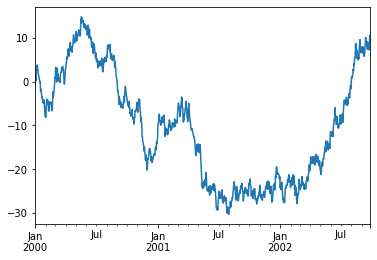

In [140]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [141]:
df = df_movies.copy()
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


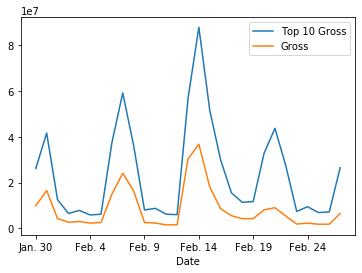

In [142]:
df.plot(x='Date', y=['Top 10 Gross', 'Gross'])

In [143]:
df_iris = get_iris_df()
df_iris.sample(5)

,petalLength,petalWidth,sepalLength,sepalWidth,species
117,6.7,2.2,7.7,3.8,virginica
119,5.0,1.5,6.0,2.2,virginica
81,3.7,1.0,5.5,2.4,versicolor
142,5.1,1.9,5.8,2.7,virginica
6,1.4,0.3,4.6,3.4,setosa


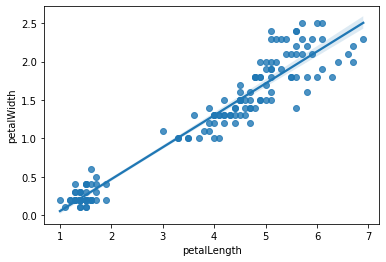

In [144]:
# 线性回归
sns.regplot(x='petalLength', y='petalWidth',data=df_iris)

## 使用另一个 DataFrame 来更新数据

In [145]:
df_1 = df_movies.copy()
df_2 = pd.DataFrame({u'#1 Movie':[u'American Sniper',
                            u'SpongeBob',
                            u'Fifty Shades of Grey'],
                            u'chs':[u'美国阻击手',
                                    u'海绵宝宝',
                                    u'五十度灰']})
df_1.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [146]:
df_2.head()

,#1 Movie,chs
0,American Sniper,美国阻击手
1,SpongeBob,海绵宝宝
2,Fifty Shades of Grey,五十度灰


In [147]:
pd.merge(df_1, df_2, on=u'#1 Movie').head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,chs
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,美国阻击手
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,美国阻击手
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,美国阻击手
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,美国阻击手
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,美国阻击手


## 导出数据

### CSV

In [148]:
# 导出周六的数据，格式为 CSV
# df[ (df['Day'] == 'Sat') ].to_csv('test_tmp.csv', mode='w', encoding='utf-8', index=False)

#在前面的文件中追加周日的数据
# df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

### Dict

In [149]:
# 输出为 dict 格式
# DataFrame.to_dict可以接受 ‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [150]:
import pprint
for p in ['dict', 'list', 'series', 'split', 'records', 'index']:
    print(f'Parameters:{p}')
    pprint.pprint(df.to_dict(p))
    print('-----------------------------------------------------')

Parameters:dict
{'AAA': {0: 4, 1: 5, 2: 6, 3: 7},
 'BBB': {0: 10, 1: 20, 2: 30, 3: 40},
 'CCC': {0: 100, 1: 50, 2: -30, 3: -50}}
-----------------------------------------------------
Parameters:list
{'AAA': [4, 5, 6, 7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]}
-----------------------------------------------------
Parameters:series
{'AAA': 0    4
1    5
2    6
3    7
Name: AAA, dtype: int64,
 'BBB': 0    10
1    20
2    30
3    40
Name: BBB, dtype: int64,
 'CCC': 0    100
1     50
2    -30
3    -50
Name: CCC, dtype: int64}
-----------------------------------------------------
Parameters:split
{'columns': ['AAA', 'BBB', 'CCC'],
 'data': [[4, 10, 100], [5, 20, 50], [6, 30, -30], [7, 40, -50]],
 'index': [0, 1, 2, 3]}
-----------------------------------------------------
Parameters:records
[{'AAA': 4, 'BBB': 10, 'CCC': 100},
 {'AAA': 5, 'BBB': 20, 'CCC': 50},
 {'AAA': 6, 'BBB': 30, 'CCC': -30},
 {'AAA': 7, 'BBB': 40, 'CCC': -50}]
-----------------------------------------------

## Cheat Sheet

英文：https://www.dataquest.io/blog/pandas-cheat-sheet/

中文翻译：http://blog.csdn.net/qq_33399185/article/details/60872853

## 相关资源

* pandas 英文最新文档 https://pandas.pydata.org/pandas-docs/stable/pandas.pdf